In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from string import ascii_lowercase


In [4]:
frase = 'babaca muleque minha primeira ai'
pool = ascii_lowercase + ' '
cel_size = len(frase)
cel_size

32

In [1]:
class Cell:
    def __init__(self, dna):
        self.dna = dna
    
    def __str__(self):
        return self.dna
    
    def fitness(self, frase):
        fitness = 1
        for i in range(len(frase)):
            if frase[i] == self.dna[i]:
                fitness += 1
        return fitness

class Pop():
    def __init__(self, size, frase, pool):
        self.size = size
        self.frase = frase
        self.cell_size = len(frase)
        self.pool = pool
        self.pop = [self.gen_cell() for _ in range(size)]
        self.fitness = []
        self.gen = 0
    
    def __str__(self):
        return '\n'.join([c.dna for c in self.pop])
        
    def gen_cell(self):
        return Cell(''.join(random.choices(self.pool, k=len(self.frase))))
        
    def calc_fitness(self):
        self.fitness = [c.fitness(self.frase) for c in self.pop]
        
    def sex(self, weights):
        parents = random.choices(pop.pop, weights=weights, k=2)
        select = np.random.randint(0,2, self.cell_size)
        child = ''.join([parents[select[i]].dna[i] for i in range(self.cell_size)])
        # mutacao
        if random.random() < 0.02:
            i = random.randint(0,self.cell_size-1)
            child = child[:i] + random.choice(self.pool) + child[i+1:]
        return child
    
    def sex2(self, weights):
        parents = random.choices(pop.pop, weights=weights, k=2)
        cut = random.randint(0, self.size-1)
        child = parents[0].dna[:cut] + parents[1].dna[cut:]
        # mutacao
        if random.random() < 0.01:
            i = random.randint(0,self.cell_size-1)
            child = child[:i] + random.choice(self.pool) + child[i+1:]
        return child
            
    def next_gen(self):
        self.gen += 1
        total_fit = sum(self.fitness)
        prob = [fit/total_fit for fit in self.fitness]
        
        self.pop = [Cell(self.sex(prob)) for _ in range(self.size)]
            

In [270]:
a = 'uniporn'
b = 'popcorn'
a[:2] + b[2:]

a[:2] + 'o' + b[2:]

'unopcorn'

In [5]:
pop = Pop(5, frase, pool)
pop.calc_fitness()
print(pop.fitness)
print(pop)

[1, 3, 3, 1, 3]
zrdxvwtnlxhseybsranfnvwtcsxmecrm
pyoqn odocdbztjxqhqu ljwmmzmkdzf
zbhaoikykupcxikkqemtrautshmis co
nqcftxpkimuuxndpgyxrkucknyts vck
nkbtmvbhjneunyxxymgjocwel cdlhtd


In [7]:
pop = Pop(200, frase, pool)
pop.calc_fitness()
fitness = max(pop.fitness)
while fitness < cel_size and pop.gen < 10000:
    pop.next_gen()
    pop.calc_fitness()
    fitness = max(pop.fitness)
    if pop.gen % 10 == 0:
        print(pop.gen, fitness)
  
# print(pop.fitness)
pop.calc_fitness()
x = np.argmax(pop.fitness)

print(pop.fitness[x])
print(frase)
print(pop.pop[x].dna)

10 13
20 19
30 25
40 25
50 28
60 29
70 30
80 30
90 31
100 31
110 31
120 31
130 31
140 31
150 31
160 31
170 31
32
babaca muleque minha primeira ai
babaca muleque minha primeirs ai


30.565 0.6370047095587285


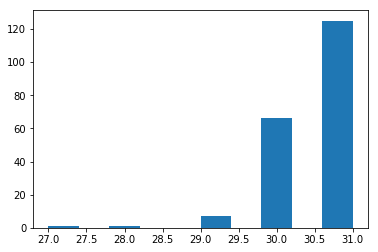

In [8]:
pop.next_gen()
pop.calc_fitness()
print(np.mean(pop.fitness), np.std(pop.fitness))
plt.hist(pop.fitness)
plt.show()